In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import urllib
from bs4 import BeautifulSoup as bs
import datetime

from pandas.io.data import DataReader
#http://pandas.pydata.org/pandas-docs/stable/remote_data.html
#DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.001)
#Currently supports Yahoo! Finance, Google Finance, St. Louis FED (FRED) 
#and Kenneth French's data library.
# #Data from Yahoo! Finance
# gs = DataReader("GS", "yahoo")
# #Data from Google Finance
#aapl = DataReader("AAPL", "google")   
# # Data from FRED
#vix = DataReader("VIXCLS", "fred")

In [2]:
help(DataReader)

Help on function DataReader in module pandas.io.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.001)
    Imports data from a number of online sources.
    
    Currently supports Yahoo! Finance, Google Finance, St. Louis FED (FRED)
    and Kenneth French's data library.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (yahoo, google, fred) will
        accept a list of names.
    data_source: str
        the data source ("yahoo", "google", "fred", or "ff")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    
    Examples
    ----------
    
    # Data from Yahoo! Finance
    gs = DataReader("GS", "yahoo")
    
    # Data from Google Finance
    aapl = DataReader("AAPL", "google")
    
    # Data from FRED
    vix = DataReader("VIXCLS", "fred")
    
    # Data from Fa

In [3]:
vix = DataReader("VIXCLS", "fred")

In [5]:
vix.tail()

,VIXCLS
DATE,
2015-06-08,15.29
2015-06-09,14.47
2015-06-10,13.22
2015-06-11,12.85
2015-06-12,13.78


In [14]:
real_gdp = DataReader("GDPC1", "fred")
unemployment_rate = DataReader("UNRATE", "fred")
jobs = DataReader("JTS1000JOL","fred")

In [18]:
msft = DataReader("MSFT",  "yahoo", datetime.date(2005,1,1))

In [31]:
ff_monthly = DataReader("F-F_Research_Data_Factors", "famafrench")[0] 
ff_annual = DataReader("F-F_Research_Data_Factors", "famafrench")[1]
ff_weekly = DataReader("F-F_Research_Data_Factors_weekly", "famafrench")[0]
ff3 = DataReader("6_Portfolios_2x3", "famafrench")
#ff4 = DataReader("F-F_ST_Reversal_Factor", "famafrench")


[0]

In [70]:
import lxml.html
# Use libxml to download the list of S&P500 companies and obtain the symbol table
page = lxml.html.parse('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
symbolslist = page.xpath('//table[1]/tr')[1:]

now = datetime.datetime.utcnow()

# Obtain the symbol information for each row in the S&P500 constituent table
symbols = []
for symbol in symbolslist:
    tds = symbol.getchildren()
    sd = {'ticker': tds[0].getchildren()[0].text, 'name': tds[1].getchildren()[0].text, 'sector': tds[3].text}
    # Create a tuple (for the DB format) and append to the grand list
    symbols.append( (sd['ticker'], sd['name'], sd['sector'], now) )
symbols = pd.DataFrame(data=symbols, columns=['ticker','name','sector','created_at_utc'])
symbols

,ticker,name,sector,created_at_utc
0,MMM,3M Company,Industrials,2015-06-09 00:32:14.819000
1,ABT,Abbott Laboratories,Health Care,2015-06-09 00:32:14.819000
2,ABBV,AbbVie,Health Care,2015-06-09 00:32:14.819000
3,ACN,Accenture plc,Information Technology,2015-06-09 00:32:14.819000
4,ACE,ACE Limited,Financials,2015-06-09 00:32:14.819000
5,ACT,Actavis plc,Health Care,2015-06-09 00:32:14.819000
6,ADBE,Adobe Systems Inc,Information Technology,2015-06-09 00:32:14.819000
7,ADT,ADT Corp,Industrials,2015-06-09 00:32:14.819000
8,AES,AES Corp,Utilities,2015-06-09 00:32:14.819000
9,AET,Aetna Inc,Health Care,2015-06-09 00:32:14.819000


In [2]:
gs = DataReader("GS", "yahoo")

In [3]:
gs.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-04,207.600006,210.059998,207.000000,208.869995,3411200,208.869995
2015-06-05,210.699997,211.940002,208.550003,210.449997,3217700,210.449997
2015-06-08,211.149994,211.699997,209.449997,209.789993,2171300,209.789993
2015-06-09,210.000000,210.440002,207.619995,209.020004,2258800,209.020004
2015-06-10,209.720001,213.399994,209.360001,213.130005,2647300,213.130005


In [52]:
x_index = [[x] for x in range(0,len(gs.index))]
y_vals = gs['Close'].tolist()
gs['index_num'] = [x for x in range(0,len(gs.index))]

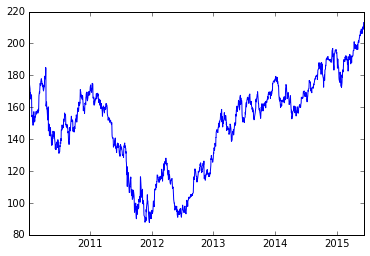

In [5]:
plt.plot(gs.index, gs['Close'])

In [53]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_index, y_vals)

rfr = RandomForestRegressor()
#br = BayesianRidge()
#lr = LogisticRegression()
#rr = Ridge()
#svr = SVR(kernel='poly')
sgd = SGDRegressor()
#kr = KernelRidge(kernel='poly')
knn = KNeighborsRegressor(n_neighbors=1)


rfr.fit(X_train, y_train)
#sgd.fit(X_train, y_train)
knn.fit(X_train, y_train)


rfr_preds = rfr.predict(x_index)
#sgd_preds = sgd.predict(x_index)
knn_preds = knn.predict(x_index)

preds = [knn_preds]


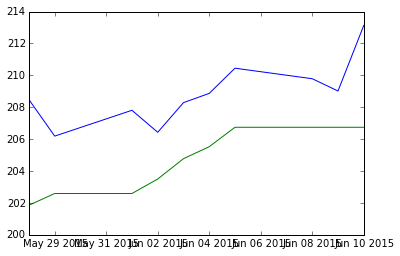

In [29]:
plt.plot(gs.index[-10:], gs['Close'][-10:])
for p in preds:
    plt.plot(gs.index[-10:], p[-10:])